<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.5.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [4]:
project_path = r"/content/drive/MyDrive/Colab Notebooks/Great_Learning/Lab AIML/Sequence model NLP"
os.chdir(project_path)
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Great_Learning/Lab AIML/Sequence model NLP'

In [5]:
data_raw = pd.read_csv('ssd_reviews.csv')
data_raw.head(5)

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


### Inferences:-
### 1. Total of 2000+ entries with 4 attributes of int datatype and 6 attributes with object datatype. 
### 2. Some of the values seems to be missing in the following attributes "review_title", "overall_review", "pros", "cons" and "ownership_period".


## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [7]:
# Checking for missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data_raw)

Your selected dataframe has 11 columns and 2227 Rows.
There are 5 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
overall_review,0,779,35.0000000,779,35.0000000,object
review_title,0,96,4.3000000,96,4.3000000,object
ownership_pariod,0,68,3.1000000,68,3.1000000,object
pros,0,22,1.0000000,22,1.0000000,object
cons,0,11,0.5000000,11,0.5000000,object


### Inferences: 
### 1.The above tabular data shows the missing value details.
### 2."overall_reivew" attribute has the most values missing about 35.00% .

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [8]:
data_raw['rating_stars'].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

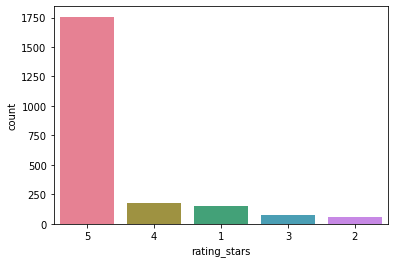

In [9]:
sns.countplot(x="rating_stars", data=data_raw, palette="husl", order = data_raw['rating_stars'].value_counts().index)

### Inferences:- 
### 1.Samsung SSD seems to be good and reliable product as most ratings are of value "5" which is the max rating.(about 1700+ in count which is more than 75% of the total reviews)
### 2.There is a imbalance in the dataset as maximum data is of rating "5".

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [10]:
data_raw['year'].value_counts()

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

### Inference:- 2015 is the year when maximum ratings and review have been recieved.

In [11]:
data_raw.groupby('year')['rating_stars'].value_counts().sort_values(ascending=False)

year  rating_stars
2015  5               763
2016  5               505
2017  5               298
2018  5               144
2015  4               102
      1                65
      3                45
2016  1                37
      4                36
2019  5                34
2015  2                31
2017  4                26
      1                25
2018  1                22
2016  3                17
2017  2                13
2014  5                12
2018  4                12
2016  2                10
2017  3                 8
2018  3                 5
      2                 4
2019  1                 4
      4                 4
      2                 2
      3                 2
2014  4                 1
Name: rating_stars, dtype: int64

### Inferences:- 
### 1. Max rating of "5" in counts was received in year 2015 about 763.
### 2. Min rating of "1" in counts was recieved in year 2015 only about 65.

#### Check mean rating for each year and write your findings

In [12]:
data_raw.groupby('year')['rating_stars'].mean().sort_values(ascending=False)

year
2014   4.9230769
2016   4.5900826
2017   4.5108108
2015   4.4582505
2019   4.3478261
2018   4.3475936
Name: rating_stars, dtype: float64

### Inference:  Max mean rating was recieved in the year of 2014 and the min mean rating was recieved in the year of 2018. But the mean rating ranges between 4.3 and 4.9 over the years.

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [13]:
data_raw['month'].value_counts()

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

### Inference: 12th month is when maximum ratings and review have been recieved.

In [14]:
data_raw.groupby('month')['rating_stars'].value_counts().sort_values(ascending=False)

month  rating_stars
12     5               210
3      5               194
1      5               182
2      5               181
4      5               157
11     5               154
7      5               128
5      5               124
9      5               121
6      5               110
10     5               103
8      5                92
12     1                29
2      4                23
12     4                22
2      1                20
11     1                18
1      4                18
4      4                17
       1                17
9      4                16
3      4                16
6      4                15
10     1                14
5      1                13
10     4                13
8      4                12
5      4                12
3      1                12
12     3                11
11     4                10
8      1                10
9      3                 9
2      2                 9
3      3                 9
4      3                 8
1      3

### Inferences:- 
### 1. Max rating of "5" in counts was received in the 12th month which is about 210.
### 2. Min rating of "1" in counts was recieved in the 12th month only which is about 29.

In [15]:
data_raw.groupby('month')['rating_stars'].mean().sort_values(ascending=False)

month
7    4.7638889
1    4.6425339
3    4.6111111
6    4.5571429
9    4.5414013
8    4.4789916
11   4.4607330
5    4.4493671
4    4.4195122
2    4.4058577
12   4.3597122
10   4.3049645
Name: rating_stars, dtype: float64

### Inference:  Max mean rating was recieved in the 7th month and the min mean rating was recieved in the 10th month. But the mean rating ranges between 4.3 and 4.7 over the months.

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [16]:
Numeric_Columns = ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod']
Labels = ['rating_stars']

In [17]:
to_drop = Numeric_Columns + Labels
text_data = data_raw.drop(to_drop, axis=1)
text_data.sample(5)

,review_title,overall_review,pros,cons
1316,550 mb s read 540 mb s write,NaN,guys samsung will give you reliable products c...,a bit expensive compared to other brands and g...
667,NaN,NaN,great 500 gigabytes installation was easy,software was useless had to go to download dif...
1382,good hd replacement,just the thing to give my old laptop new life,faster seek than the original hd,a little more expensive than a standard hd
1294,i guess i got the lemon,i dont usually write reviews but im annoyed wi...,its not a car,well ive had it since october replacing a mush...
1641,have not used item yet hope its good,i think it will be a good ssd but hopefully i ...,will be coming shortly,none


#### Replace null values (NaN) with blanks

In [18]:
text_data.isna().sum().sort_values(ascending=False)

overall_review    779
review_title       96
pros               22
cons               11
dtype: int64

In [19]:
text_data.fillna(" ", inplace = True)

#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [20]:
combined_data = text_data.apply( lambda x: " ".join(x), axis=1)
combined_data.sample(5)

1257    great quality price i own a corsair 3 samsung ...
670     huge difference after using ssd as my primary ...
868     does the trick would buy again and recommend t...
90      great product   very fast ans very sturdy this...
594     super fast just what i needed highly recommend...
dtype: object

In [21]:
data = pd.DataFrame(combined_data, columns=['combined_reviews'])

In [22]:
data['rating_stars'] = data_raw['rating_stars']
data.sample(5)

,combined_reviews,rating_stars
331,it s a samsung price is a steal what can you r...,5
348,always quality drives huge fan of the samsung ...,5
908,easy to install great performance 10 out o...,5
740,good ssd for great price cheap and reliable ...,5
523,great ssd fast bootup none,5


#### Check if there are any null values and drop NaN values if any

In [23]:
data.isna().sum()

combined_reviews    0
rating_stars        0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [24]:
data['word_length'] = data['combined_reviews'].apply(lambda x : len(x.split(" " or "  ")))
data.sample(5)

,combined_reviews,rating_stars,word_length
110,amzing price a fast drive at a great price no ...,5,43
736,best decision i have made in a while you can t...,5,251
2120,very fast i found the software cd to be very g...,5,53
1747,these complaints should be addressed to sams...,3,121
1238,junk migration software ssd is worthless when ...,1,35


#### Check summary stats of the length column

In [25]:
data['word_length'].describe()

count   2227.0000000
mean      85.2752582
std       87.3063671
min        6.0000000
25%       31.0000000
50%       60.0000000
75%      109.0000000
max     1615.0000000
Name: word_length, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [26]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [28]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data['combined_reviews'])
X = tokenizer.texts_to_sequences(data['combined_reviews'])
print("No. of Samples: ", len(X))
print('-' * 25)
print(X[0])

No. of Samples:  2227
-------------------------
[232, 93, 6, 19, 54, 22, 829, 10, 248, 162, 16, 830, 550, 145, 7, 264, 126]


#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
X = pad_sequences(X, maxlen=maxlen)
y = np.asarray(data['rating_stars'])

print("Number of Labels: ", len(y))
print('-' * 25)
print(y[0])

Number of Labels:  2227
-------------------------
5


#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [31]:
X.shape

(2227, 25)

In [32]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0, 232,  93,   6,  19,  54,
        22, 829,  10, 248, 162,  16, 830, 550, 145,   7, 264, 126],
      dtype=int32)

#### Check the total number of words in the dictionary (of tekenizer)

In [33]:
num_words = len(tokenizer.word_index) + 1
print(" Total no. of words in tokenizer: ", num_words)

 Total no. of words in tokenizer:  8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [34]:
embeddings = {}
for g in open('glove.6B.50d.txt'):
  word = g.split(" ")[0]
  embd = g.split(" ")[1:]
  embd = np.asarray(embd, dtype=np.float32)
  embeddings[word] = embd

#### Check length of the embedding

In [35]:
print("Length of embeddings: ", len(embeddings.values()))

Length of embeddings:  400000


#### Create a weight matrix for words in the training docs

In [36]:
embedding_matrix = np.zeros((num_words, 50))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [37]:
embedding_matrix.shape

(8839, 50)

In [38]:
embedding_matrix[5]

array([ 0.21705   ,  0.46515   , -0.46757001,  0.10082   ,  1.01349998,
        0.74844998, -0.53104001, -0.26256001,  0.16812   ,  0.13181999,
       -0.24909   , -0.44185001, -0.21739   ,  0.51003999,  0.13448   ,
       -0.43141001, -0.03123   ,  0.20674001, -0.78138   , -0.20148   ,
       -0.097401  ,  0.16088   , -0.61835998, -0.18504   , -0.12461   ,
       -2.25259995, -0.22321001,  0.5043    ,  0.32257   ,  0.15312999,
        3.96359992, -0.71364999, -0.67012   ,  0.28388   ,  0.21738   ,
        0.14432999,  0.25926   ,  0.23434   ,  0.42739999, -0.44451001,
        0.13812999,  0.36973   , -0.64288998,  0.024142  , -0.039315  ,
       -0.26036999,  0.12017   , -0.043782  ,  0.41012999,  0.1796    ])

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [39]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y_encoded = enc.fit_transform(y.reshape(-1,1))
print(y_encoded[0])

  (0, 4)	1.0


In [40]:
y_encoded = y_encoded.todense()
y_encoded

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

### 4.8 Split the data into Train & Test sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, shuffle = True, random_state = 10, test_size = 0.3, stratify = y_encoded)

In [42]:
print("Shape of Training Data: ", X_train.shape)
print('-' * 30)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (1558, 25)
------------------------------
Shape of Testing Data:  (669, 25)


## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [43]:
#Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

In [44]:
# Base Model Architechture
clear_session()
model = Sequential()
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen))
model.add(LSTM(128, return_sequences = True))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation = 'softmax'))

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [45]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

### 5.3 Fit the model

In [47]:
batch_size = 128
epochs = 30

In [48]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 5s 190ms/step - loss: 1.0446 - accuracy: 0.7375 - val_loss: 0.7925 - val_accuracy: 0.7892
Epoch 2/30
13/13 [==============================] - 2s 141ms/step - loss: 0.7909 - accuracy: 0.7882 - val_loss: 0.6869 - val_accuracy: 0.7892
Epoch 3/30
13/13 [==============================] - 2s 144ms/step - loss: 0.7282 - accuracy: 0.7882 - val_loss: 0.6960 - val_accuracy: 0.7892
Epoch 4/30
13/13 [==============================] - 2s 139ms/step - loss: 0.6831 - accuracy: 0.7882 - val_loss: 0.6552 - val_accuracy: 0.7892
Epoch 5/30
13/13 [==============================] - 2s 141ms/step - loss: 0.6177 - accuracy: 0.7914 - val_loss: 0.6702 - val_accuracy: 0.7788
Epoch 6/30
13/13 [==============================] - 2s 141ms/step - loss: 0.5886 - accuracy: 0.7985 - val_loss: 0.6459 - val_accuracy: 0.7877
Epoch 7/30
13/13 [==============================] - 2s 142ms/step - loss: 0.5147 - accuracy: 0.8087 - val_loss: 0.6685 - val_accuracy: 0.7848
Epoch 

In [49]:
# Final evaluation of the model
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 100.000%
Train Loss: 0.000

Test Accuracy: 77.429%
Test Loss: 2.155


### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [50]:
# Predicting for all of test dataset 
predictions = model.predict(X_test)
predictions[0]

array([8.5867661e-08, 3.7210228e-08, 9.9070689e-08, 1.7268945e-05,
       9.9998248e-01], dtype=float32)

In [51]:
# Inversing the encoded test labels
y_test_inv = enc.inverse_transform(y_test)
y_test_inv[0]

array([5])

In [52]:
# Inversing the predicted test labels
y_pred_inv = enc.inverse_transform(np.around(predictions))
y_pred_inv[0]

array([5])

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, f1_score

Text(0.5, 1.0, 'Accuracy Score for CNN: 0.772795216741405')

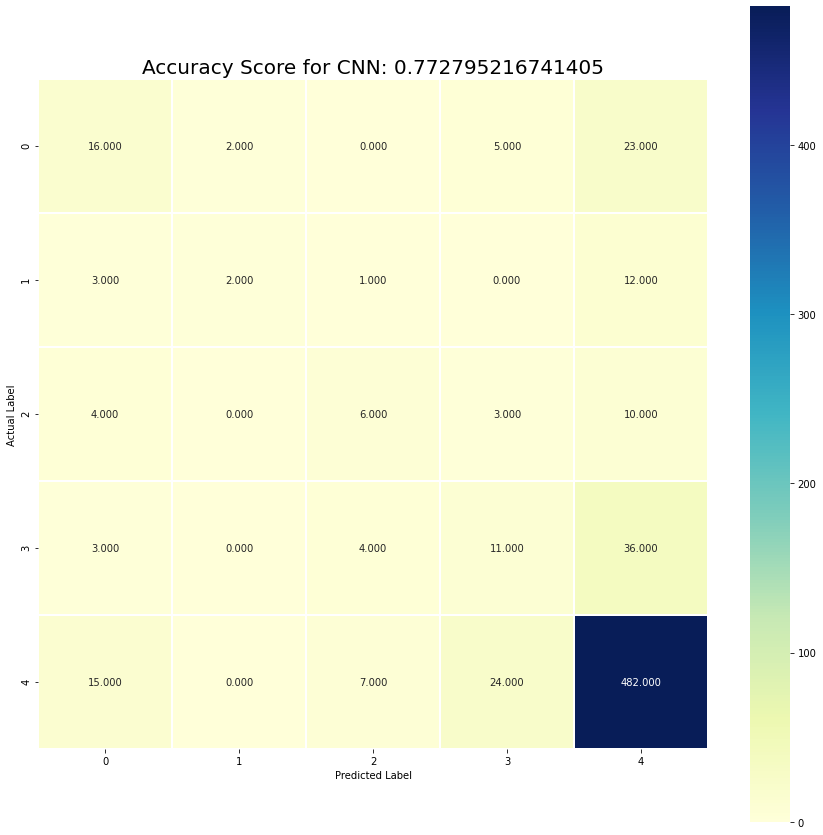

In [54]:
# Confusion Matrix

cm = confusion_matrix(y_test_inv,y_pred_inv)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for CNN: {0}'.format(accuracy_score(y_test_inv,y_pred_inv))
plt.title(all_sample_title, size = 20)

### Inference: Model is predicting the majority rating well.

In [55]:
# Classification Report
print(classification_report(y_test_inv, y_pred_inv, labels=[1, 2, 3, 4, 5]))

              precision    recall  f1-score   support

           1       0.39      0.35      0.37        46
           2       0.50      0.11      0.18        18
           3       0.33      0.26      0.29        23
           4       0.26      0.20      0.23        54
           5       0.86      0.91      0.88       528

    accuracy                           0.77       669
   macro avg       0.47      0.37      0.39       669
weighted avg       0.75      0.77      0.76       669



### Inference:- Macro F1 Score is very low hence the overall performance of model is not good.

### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

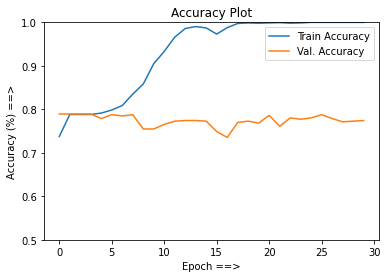

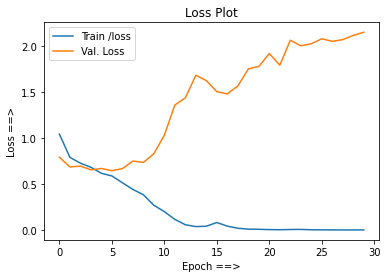

In [56]:
# Plotting the accuracy history

def plot_accuracy(history):
  plt.figure()
  plt.title("Accuracy Plot")
  plt.xlabel('Epoch ==>')
  plt.ylabel('Accuracy (%) ==>')
  plt.plot(history.epoch, np.array(history.history['accuracy']),
           label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']),
           label = 'Val. Accuracy')
  plt.legend()
  plt.ylim([0.5, 1])

# Plotting the loss history

def plot_loss(history):
  plt.figure()
  plt.title("Loss Plot")
  plt.xlabel('Epoch ==>')
  plt.ylabel('Loss ==>')
  plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train /loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val. Loss')
  plt.legend()

plot_accuracy(history)
plot_loss(history)

### Inference:- Training accuracy shoots up after 4 epochs and reaches 100% in 15 epochs whereas the validation loss starts shooting up after 6 epochs.

In [57]:
#Creating DataFrame for storing the accuracies of all different models
col_names = ['Model', 'Accuracy', 'F1_Score']
resultsdf = pd.DataFrame(columns = col_names)
print(resultsdf)

Empty DataFrame
Columns: [Model, Accuracy, F1_Score]
Index: []


In [58]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['Base Model'],'Accuracy': (accuracy_score(y_test_inv, y_pred_inv)), 'F1_Score':(f1_score(y_test_inv, y_pred_inv,average = 'macro'))},index={'1'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

,Model,Accuracy,F1_Score
1,Base Model,0.7727952,0.3905429


### Inference:- Base model accuracy wise is not bad but since this is a multiclass classification with class imbalance macro f1 score would be a good predictor of performance. Macro F1 Score of base model is not up to the mark.

## 6. Conclusion and Interpretation

### Inferences:- 
### 1.Model is overfitting and the dataset imbalance is being learnt by the model due to which the f1 score of rating "5" is higher compared to other ratings.
### 2. This can be tackled by under sampling the majority rating or adding more data.
### 3. Also k-fold cross validation can help to some extent.
### 4. And finally hyperparameter tunning the model would help resolve this.

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

# 1a.Activation Function "LeakyReLU"

In [59]:
from tensorflow.keras.layers import LeakyReLU
Leaky_Relu = LeakyReLU()

In [60]:
# Model Architecture with Leaky_ReLu
clear_session()
model_lr = Sequential()
model_lr.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen))
model_lr.add(LSTM(128, return_sequences = True))
model_lr.add(Flatten())
model_lr.add(Dense(512, activation = Leaky_Relu))
model_lr.add(Dense(256, activation = Leaky_Relu))
model_lr.add(Dense(128, activation = Leaky_Relu))
model_lr.add(Dense(64, activation = Leaky_Relu))
model_lr.add(Dropout(0.3))
model_lr.add(Dense(5, activation = 'softmax'))

model_lr.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [61]:
model_lr.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [62]:
history_lr = model_lr.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 5s 204ms/step - loss: 0.9884 - accuracy: 0.7253 - val_loss: 0.8185 - val_accuracy: 0.7892
Epoch 2/30
13/13 [==============================] - 2s 145ms/step - loss: 0.8216 - accuracy: 0.7888 - val_loss: 0.7037 - val_accuracy: 0.7892
Epoch 3/30
13/13 [==============================] - 2s 146ms/step - loss: 0.7004 - accuracy: 0.7895 - val_loss: 0.6768 - val_accuracy: 0.7818
Epoch 4/30
13/13 [==============================] - 2s 144ms/step - loss: 0.6407 - accuracy: 0.7920 - val_loss: 0.7002 - val_accuracy: 0.7892
Epoch 5/30
13/13 [==============================] - 2s 148ms/step - loss: 0.6181 - accuracy: 0.7978 - val_loss: 0.7354 - val_accuracy: 0.7459
Epoch 6/30
13/13 [==============================] - 2s 146ms/step - loss: 0.6094 - accuracy: 0.7927 - val_loss: 0.6732 - val_accuracy: 0.7937
Epoch 7/30
13/13 [==============================] - 2s 144ms/step - loss: 0.4809 - accuracy: 0.8280 - val_loss: 0.6675 - val_accuracy: 0.7907
Epoch 

In [63]:
# Final evaluation of the model
loss, acc = model_lr.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = model_lr.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 100.000%
Train Loss: 0.000

Test Accuracy: 78.027%
Test Loss: 2.430


In [64]:
# Predicting for all of test dataset 
predictions_lr = model_lr.predict(X_test)
predictions_lr[0]

array([1.75828646e-07, 1.25264705e-05, 2.13957742e-06, 3.07607115e-04,
       9.99677539e-01], dtype=float32)

In [65]:
# Inversing the predicted test labels
y_pred_inv_lr = enc.inverse_transform(np.around(predictions_lr))
y_pred_inv_lr[0]

array([5])

Text(0.5, 1.0, 'Accuracy Score for CNN: 0.7817638266068759')

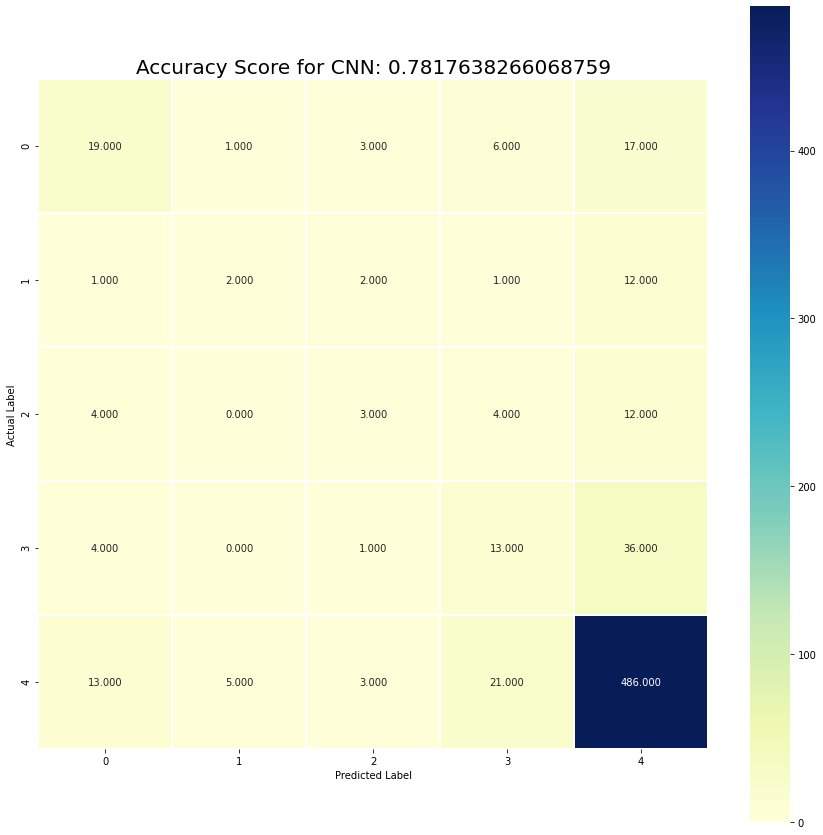

In [66]:
# Confusion Matrix

cm = confusion_matrix(y_test_inv,y_pred_inv_lr)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for CNN: {0}'.format(accuracy_score(y_test_inv,y_pred_inv_lr))
plt.title(all_sample_title, size = 20)

In [67]:
# Classification Report
print(classification_report(y_test_inv, y_pred_inv_lr, labels=[1, 2, 3, 4, 5]))

              precision    recall  f1-score   support

           1       0.46      0.41      0.44        46
           2       0.25      0.11      0.15        18
           3       0.25      0.13      0.17        23
           4       0.29      0.24      0.26        54
           5       0.86      0.92      0.89       528

    accuracy                           0.78       669
   macro avg       0.42      0.36      0.38       669
weighted avg       0.75      0.78      0.76       669



In [68]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['Leaky_ReLU'],'Accuracy': (accuracy_score(y_test_inv, y_pred_inv_lr)), 'F1_Score':(f1_score(y_test_inv, y_pred_inv_lr, average = 'macro'))},index={'2'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

,Model,Accuracy,F1_Score
1,Base Model,0.7727952,0.3905429
2,Leaky_ReLU,0.7817638,0.3831217


### Inference:- ReLU Activation function is better than Leaky ReLU for this dataset.

# 1b.Activation Function "TanH"

In [69]:
# Model Architechture with "TanH" activation function
clear_session()
model_th = Sequential()
model_th.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen))
model_th.add(LSTM(128, return_sequences = True))
model_th.add(Flatten())
model_th.add(Dense(512, activation = 'tanh'))
model_th.add(Dense(256, activation = 'tanh'))
model_th.add(Dense(128, activation = 'tanh'))
model_th.add(Dense(64, activation = 'tanh'))
model_th.add(Dropout(0.3))
model_th.add(Dense(5, activation = 'softmax'))

model_th.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [70]:
model_th.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [71]:
history_th = model_th.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 4s 180ms/step - loss: 0.9910 - accuracy: 0.7221 - val_loss: 0.7901 - val_accuracy: 0.7892
Epoch 2/30
13/13 [==============================] - 2s 140ms/step - loss: 0.8374 - accuracy: 0.7869 - val_loss: 0.8033 - val_accuracy: 0.7892
Epoch 3/30
13/13 [==============================] - 2s 139ms/step - loss: 0.8539 - accuracy: 0.7882 - val_loss: 0.7768 - val_accuracy: 0.7892
Epoch 4/30
13/13 [==============================] - 2s 141ms/step - loss: 0.8116 - accuracy: 0.7792 - val_loss: 0.7175 - val_accuracy: 0.7892
Epoch 5/30
13/13 [==============================] - 2s 141ms/step - loss: 0.7333 - accuracy: 0.7811 - val_loss: 0.7130 - val_accuracy: 0.7833
Epoch 6/30
13/13 [==============================] - 2s 138ms/step - loss: 0.6861 - accuracy: 0.7914 - val_loss: 0.6904 - val_accuracy: 0.7803
Epoch 7/30
13/13 [==============================] - 2s 138ms/step - loss: 0.6259 - accuracy: 0.8068 - val_loss: 0.6754 - val_accuracy: 0.7907
Epoch 

In [72]:
# Final evaluation of the model
loss, acc = model_th.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = model_th.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 100.000%
Train Loss: 0.002

Test Accuracy: 77.429%
Test Loss: 1.450


In [73]:
# Predicting for all of test dataset 
predictions_th = model_th.predict(X_test)
predictions_th[0]

array([2.0908325e-05, 1.2099512e-03, 2.1143863e-04, 7.6526310e-04,
       9.9779248e-01], dtype=float32)

In [74]:
# Inversing the predicted test labels
y_pred_inv_th = enc.inverse_transform(np.around(predictions_th))
y_pred_inv_th[0]

array([5])

Text(0.5, 1.0, 'Accuracy Score for CNN: 0.7742899850523169')

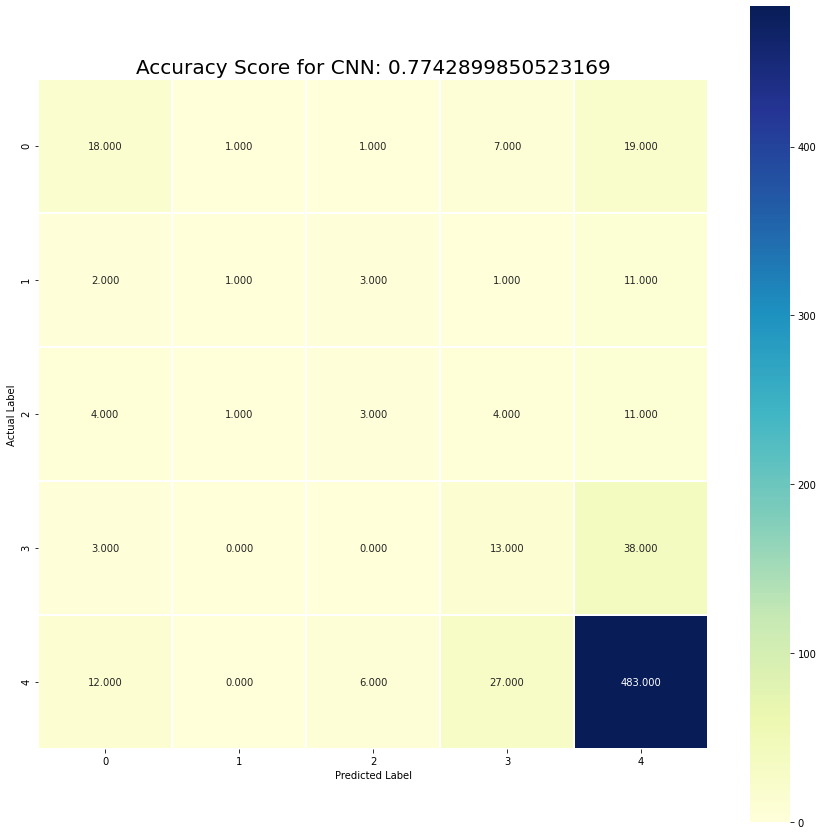

In [75]:
# Confusion Matrix

cm = confusion_matrix(y_test_inv,y_pred_inv_th)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for CNN: {0}'.format(accuracy_score(y_test_inv,y_pred_inv_th))
plt.title(all_sample_title, size = 20)

In [76]:
# Classification Report
print(classification_report(y_test_inv, y_pred_inv_th, labels=[1, 2, 3, 4, 5]))

              precision    recall  f1-score   support

           1       0.46      0.39      0.42        46
           2       0.33      0.06      0.10        18
           3       0.23      0.13      0.17        23
           4       0.25      0.24      0.25        54
           5       0.86      0.91      0.89       528

    accuracy                           0.77       669
   macro avg       0.43      0.35      0.36       669
weighted avg       0.75      0.77      0.76       669



In [77]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['TanH'],'Accuracy': (accuracy_score(y_test_inv, y_pred_inv_th)), 'F1_Score':(f1_score(y_test_inv, y_pred_inv_th, average = 'macro'))},index={'3'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

,Model,Accuracy,F1_Score
1,Base Model,0.7727952,0.3905429
2,Leaky_ReLU,0.7817638,0.3831217
3,TanH,0.7742900,0.3633911


### Inference: ReLU and Leaky ReLU is better than TanH activation function.

# 3.Hyperparameter tunning

In [78]:
from tensorflow.keras.optimizers import RMSprop
rms_opt = RMSprop(lr=0.001)

In [79]:
# Hyperparameter tunned Model Architechture 
clear_session()
model_hpt = Sequential()
model_hpt.add(Embedding(num_words, embedding_size, weights = [embedding_matrix], input_length = maxlen))
model_hpt.add(LSTM(128, return_sequences = True))
model_hpt.add(Flatten())
model_hpt.add(Dense(512, activation = 'tanh'))
model_hpt.add(Dense(256, activation = 'tanh'))
model_hpt.add(Dense(128, activation = 'tanh'))
model_hpt.add(Dense(64, activation = 'tanh'))
model_hpt.add(Dropout(0.3))
model_hpt.add(Dense(5, activation = 'softmax'))

model_hpt.compile(loss = "categorical_crossentropy", optimizer = rms_opt, metrics = ['accuracy'])

In [80]:
model_hpt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 50)            441950    
_________________________________________________________________
lstm (LSTM)                  (None, 25, 128)           91648     
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1638912   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [81]:
history_hpt = model_hpt.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 5s 216ms/step - loss: 0.9973 - accuracy: 0.7182 - val_loss: 0.7960 - val_accuracy: 0.7892
Epoch 2/30
13/13 [==============================] - 2s 149ms/step - loss: 0.8978 - accuracy: 0.7625 - val_loss: 0.8824 - val_accuracy: 0.7892
Epoch 3/30
13/13 [==============================] - 2s 149ms/step - loss: 0.8588 - accuracy: 0.7811 - val_loss: 1.1566 - val_accuracy: 0.7892
Epoch 4/30
13/13 [==============================] - 2s 148ms/step - loss: 0.9312 - accuracy: 0.7651 - val_loss: 0.8340 - val_accuracy: 0.7892
Epoch 5/30
13/13 [==============================] - 2s 143ms/step - loss: 0.8656 - accuracy: 0.7734 - val_loss: 0.8341 - val_accuracy: 0.7892
Epoch 6/30
13/13 [==============================] - 2s 146ms/step - loss: 0.8569 - accuracy: 0.7574 - val_loss: 0.7583 - val_accuracy: 0.7892
Epoch 7/30
13/13 [==============================] - 2s 142ms/step - loss: 0.7779 - accuracy: 0.7721 - val_loss: 0.7342 - val_accuracy: 0.7892
Epoch 

In [82]:
# Final evaluation of the model
loss, acc = model_hpt.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print()

loss, acc = model_hpt.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 100.000%
Train Loss: 0.000

Test Accuracy: 77.130%
Test Loss: 1.600


In [83]:
# Predicting for all of test dataset 
predictions_hpt = model_hpt.predict(X_test)
predictions_hpt[0]

array([2.0576441e-05, 2.0276105e-03, 1.0427081e-04, 1.2915954e-04,
       9.9771845e-01], dtype=float32)

In [84]:
# Inversing the predicted test labels
y_pred_inv_hpt = enc.inverse_transform(np.around(predictions_hpt))
y_pred_inv_hpt[0]

array([5])

Text(0.5, 1.0, 'Accuracy Score for CNN: 0.7713004484304933')

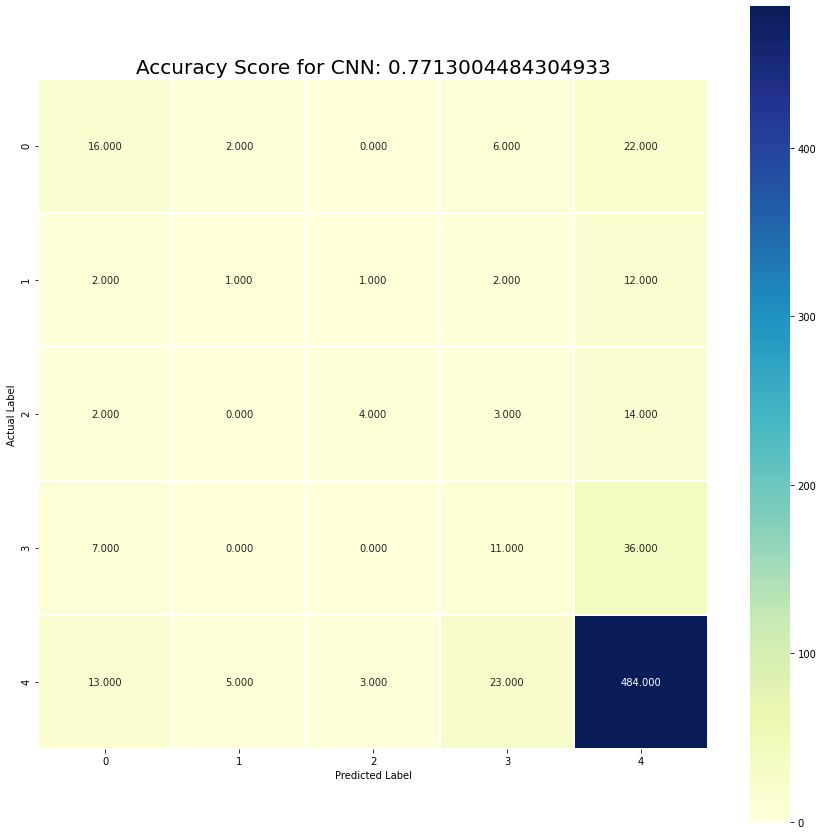

In [85]:
# Confusion Matrix

cm = confusion_matrix(y_test_inv,y_pred_inv_hpt)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score for CNN: {0}'.format(accuracy_score(y_test_inv,y_pred_inv_hpt))
plt.title(all_sample_title, size = 20)

In [86]:
# Classifiation Report
print(classification_report(y_test_inv, y_pred_inv_hpt, labels=[1, 2, 3, 4, 5]))

              precision    recall  f1-score   support

           1       0.40      0.35      0.37        46
           2       0.12      0.06      0.08        18
           3       0.50      0.17      0.26        23
           4       0.24      0.20      0.22        54
           5       0.85      0.92      0.88       528

    accuracy                           0.77       669
   macro avg       0.42      0.34      0.36       669
weighted avg       0.74      0.77      0.75       669



In [87]:
# Adding Final accuracy value to Results DataFrame
tempResultsDf = pd.DataFrame({'Model':['HyPaTu'],'Accuracy': (accuracy_score(y_test_inv, y_pred_inv_hpt)), 'F1_Score':(f1_score(y_test_inv, y_pred_inv_hpt, average = 'macro'))},index={'4'})
resultsdf = pd.concat([resultsdf, tempResultsDf])
resultsdf

,Model,Accuracy,F1_Score
1,Base Model,0.7727952,0.3905429
2,Leaky_ReLU,0.7817638,0.3831217
3,TanH,0.7742900,0.3633911
4,HyPaTu,0.7713004,0.3625029


### Inference:- Here model with tanh activation and RMSProp Optimizer with learning rate of 0.01 gives less macro F1 Score than base model. Tunning the hyperparameters along with under sampling the majority class with k-fold cross validation will give better results.